<img src="../Images/American_Sign_Language_ASL.svg" width="640" height="60" align="center"/>
<center><b>Fig. 1</b><br></center><center>Reference Wikipedia: By Psiĥedelisto<br><i>https://commons.wikimedia.org/w/index.php?curid=53652991<i></center>

# What is the problem?<br>
Many people in North America (USA and Canada) don't have the ability to communicate verbally, so they have to use other ways of communication, like the American Sign Language. The problem with this type of communication is that many people don't know how to interpret it or use it. So what can we do about it?
<br>
# Context<br>
American Sign Language (ASL) is the natural language of around 500,000 hearing impaired people in the US and Canada. A “natural” language is a language that is learned as a first language in childhood. However, not all people with this problem learn ASL as their first language.<br><br>
The National Center for Health Statistics estimates that 28 million Americans (about 10% of the population) have some degree of hearing loss. About 2 million of these 28 million people are classified as deaf (they can’t hear everyday sounds or speech even with a hearing aid). Only about 10% of these 2 million people were born deaf. The other 90% became deaf later in life.
Moreover, according to the World Federation of the Deaf, there are more than 70 million deaf people worldwide. More than 80% of them live in developing countries.<br><br>
Many hearing people are fluent in ASL. Sign language has become more and more popular in recent years and many hearing people are registering for high school and college ASL classes. And according to The Rhode Island Commission on the Deaf and Hard of Hearing (RICDHH) ASL is the third most used language in the United States, after English and Spanish.<br><br>
__But, what is Sign Language?__<br><br>
According to Wikipedia, ASL is a complete and organized visual language that is expressed by both manual and nonmanual features.<br><br>
ASL is not English at all. ASL is a distinct language with its own syntax and grammar and has been developed over many years by deaf people as a means of communication.<br><br>
Deaf people who use ASL see this language as not only a means of communication, but a source of cultural unity and pride.
Due to the importance of sign languages around the world, there must be a simple way to be able to communicate with each other as simple as any daily life activity.<br><br>
# The solution<br>
Create an application to help both sides of this problem to communicate effectively with each other by translating a message to text when using ASL.

To begin with this project, let's take a look at the steps that I will take to be able to create a model that can effectively classify the different images that I will show to it. The goal in this part of the project will be to achieve a high accuracy in the classification, as close as possible to 1.<br><br>

The steps that I will take are as follows:<br><br>
    
&nbsp;&nbsp;&nbsp;1) Data Wrangling and EDA on the datasets available<br>
&nbsp;&nbsp;&nbsp;2) Data preparation and processing to train a model<br>
&nbsp;&nbsp;&nbsp;3) Train different CNN models to find the one with the best accuracy<br>
&nbsp;&nbsp;&nbsp;4) Save and load the model and test it in a validation set<br>
&nbsp;&nbsp;&nbsp;5) Try using this model in real time classification using my webcam<br>

# The data

The data consists of 3 datasets from different sources. The goal of using different datasets from different sources is to train the model on a wider set of images that can contain different features that could help the model to generalize better. Although, I can anticipate that the challenge to increase accuracy will be harder.<br><br>
The datasets have the following information:<br><br>

__Data set No. 1 Name: ASL__<br><br>
&nbsp;&nbsp;&nbsp;a) Number of images: 84,000<br>
&nbsp;&nbsp;&nbsp;b) Number of classes: 28 (26 classes for the letters in the alphabet and Delete and Space)<br>
&nbsp;&nbsp;&nbsp;c) Format: Color images in size 200 x 200 x 3<br>
&nbsp;&nbsp;&nbsp;d) Source: https://www.kaggle.com/datasets/grassknoted/asl-alphabet<br><br>

__Data set No. 2 Name: MNIST__<br><br>
&nbsp;&nbsp;&nbsp;a) Number of images: 34,627 (separated in train_set: 27455 and test_set: 7172)<br>
&nbsp;&nbsp;&nbsp;b) Number of classes: 24 (24 classes for the letters in the alphabet except 'J' and 'Z')<br>
&nbsp;&nbsp;&nbsp;c) Format: A csv file of grayscale images of size 28 x 28 x 1 (rows of 784 pixels)<br>
&nbsp;&nbsp;&nbsp;d) Source: https://www.kaggle.com/datasets/datamunge/sign-language-mnist<br><br>

__Data set No. 3 Name: APPLE CAM__<br><br>
&nbsp;&nbsp;&nbsp;a) Number of images: 28,000<br>
&nbsp;&nbsp;&nbsp;b) Number of classes: 28 (26 classes for the letters in the alphabet and Delete and Space)<br>
&nbsp;&nbsp;&nbsp;c) Format: Grayscale images in size 28 x 28 x 1<br>
&nbsp;&nbsp;&nbsp;d) Source: Made personally with webcam<br><br>

Now, let's begin with the first step in the process.

# Data Wrangling and EDA

In [2]:
#First, let's import all the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from skimage import color
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')

Let's open the MNIST dataset that is already in a csv format. For the other two datasets, I will need to convert them to a dataframe. Now, since I know that the MNIST file and the APPLE_CAM set are both in a size of 28 x 28 x 1, I will have to convert the ASL set to this same size.

In [3]:
#Let's open the MNIST train set
train_MNIST = pd.read_csv('Sign language MNIST images/sign_mnist_train.csv')
train_MNIST.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#Let's open the MNIST test set
test_MNIST = pd.read_csv('Sign language MNIST images/sign_mnist_test.csv')
test_MNIST.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Before handling any other datasets, I will make sure that the information on the MNIST sets is in the correct format and that the values are not missing or corrupted

In [5]:
#Let's see if there are any missing values
print(train_MNIST.isnull().any().sum())
print(test_MNIST.isnull().any().sum())

0
0


In [6]:
train_MNIST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [7]:
test_MNIST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
train_MNIST.shape, test_MNIST.shape

((27455, 785), (7172, 785))

Both datasets don't have any missing values and the data is in integer values for the pixels in every image. Both data frames have 785 columns which indicate the 784 pixels on every image (28 x 28) and the label column.<br><br>Now let's check if all the values are between 0 and 255 for every pixel.

In [9]:
#Check if all the integer values are between 0 and 255
print((((train_MNIST >= 0) & (train_MNIST <= 255)) == 0).any().sum())
print((((test_MNIST >= 0) & (test_MNIST <= 255)) == 0).any().sum())

0
0


There are no negative values or values higher than 255 that could affect the training of the model. Now let's take a look at an example of an image in each set for every of the 24 classes

In [10]:
#First, let's create a dictionary of the 24 classes that we have in the datasets.
#I need to consider that there is no 'J' nor 'Z'
import string
alphabet = [value for value in string.ascii_uppercase if value not in ['J','Z']]
classes = sorted(train_MNIST['label'].unique().tolist())
dict_classes = dict(zip(classes, alphabet))
dict_classes

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

The dictionary is correct. It does not have the class 9 for the letter 'J', nor the class 25 for the letter 'Z'. Now let's check a few samples of the images in both sets.

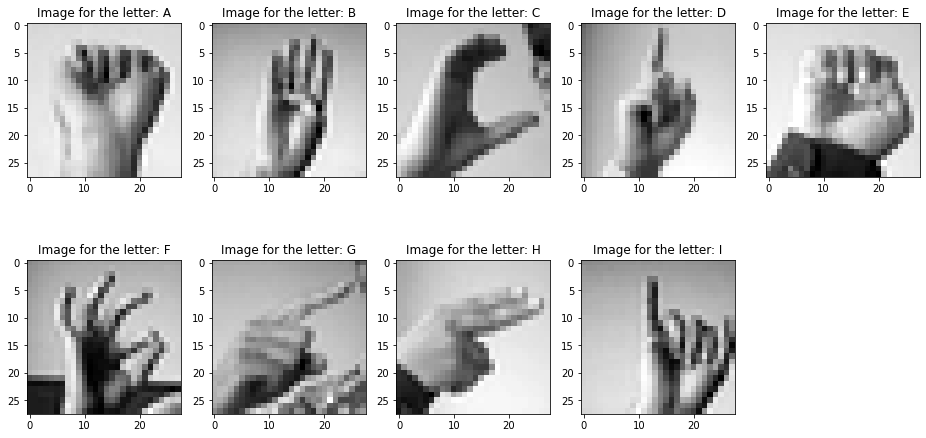

In [11]:
fig = plt.figure(figsize=(16,8))
key = 0
for i in range(1,11):
    if key != 9:
        fig.add_subplot(2, 5, i)
        img = train_MNIST.loc[train_MNIST['label'] == key].drop(columns='label').iloc[0].to_numpy()
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.title(f'Image for the letter: {dict_classes[key]}')
    key += 1

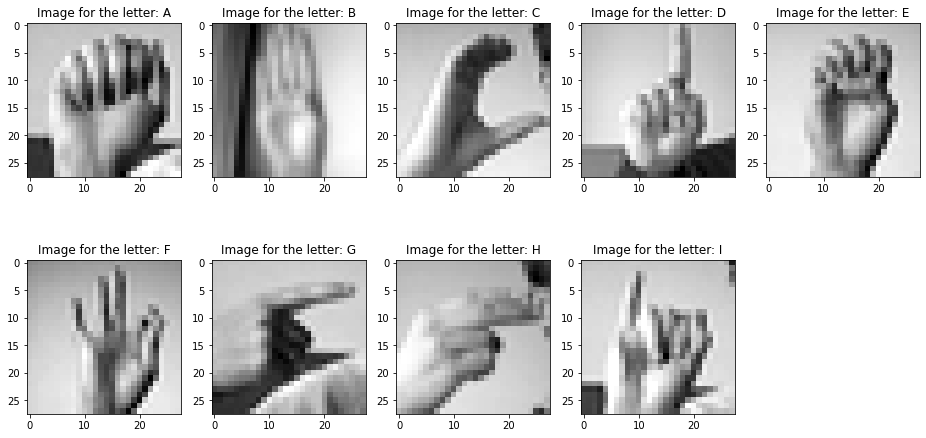

In [12]:
fig = plt.figure(figsize=(16,8))
key = 0
for i in range(1,11):
    if key != 9:
        fig.add_subplot(2, 5, i)
        img = test_MNIST.loc[test_MNIST['label'] == key].drop(columns='label').iloc[0].to_numpy()
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.title(f'Image for the letter: {dict_classes[key]}')
    key += 1

The samples seem to be correct to the label they have. Now I will check the balance of the classes.

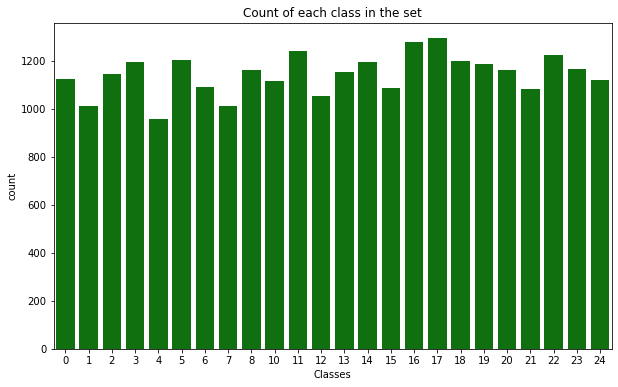

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(train_MNIST['label'], color='g')
plt.title('Count of each class in the set')
plt.xlabel('Classes')
plt.show()

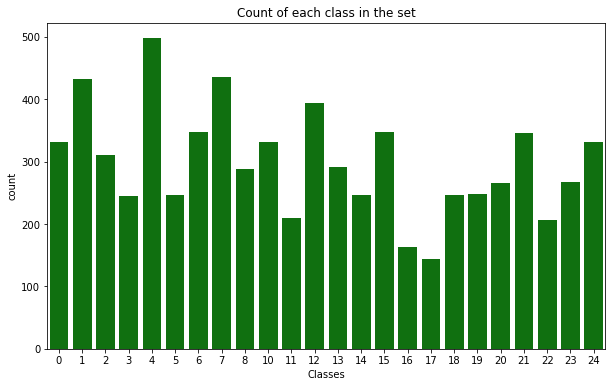

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(test_MNIST['label'], color='g')
plt.title('Count of each class in the set')
plt.xlabel('Classes')
plt.show()

The classes in the training set seem well balanced. On the other hand, the classes on the test set are not. This is not a problem because the test_MNIST set will be used only for predictions.<br><br>
Later on, I will concatenate the other datasets together with the train_MNIST set to have all the training information in one dataframe.<br><br>
For now, let's continue to get the two remaining datasets ready for use.<br><br>
Let's start with the ASL dataset which has 84,000 color images with size of 200 x 200 pixels, and 28 classes (four classes more than the MNIST set).

In [15]:
#Let's take a look at an example of an image of the ASL set. This set has color images of 200 x 200 pixels
img = Image.open('ASL images/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')
img = np.asarray(img)
img.shape

(200, 200, 3)

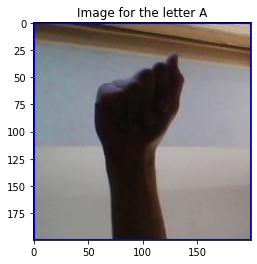

In [16]:
#I could confirm that in fact the images are 200 x 2000 x 3 in size, let's show the image
plt.imshow(img)
plt.title('Image for the letter A')
plt.show()

Now I will have to resize the images and transform each one of them into a row in a dataframe. To do this I will use the "image_dataset_from_directory" utility from keras library.

In [18]:
#I choose the directory from which to extract the images
directory = 'ASL images/asl_alphabet_train/asl_alphabet_train'

train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred", #labels are inferred from the labeled subfolders
    label_mode="int", #labels will be as integers
    seed = 0,
    color_mode="grayscale", #change to grayscale
    batch_size=30, 
    image_size=(28, 28), #resize the images
    shuffle=True
)

Found 84000 files belonging to 28 classes.


In [19]:
#Convert the output of the previous step to an array
train_arr = tfds.as_numpy(train)

In [20]:
#Create a list of the column names of the dataframe
pixels = []
for i in range(784):
    pixels.append(f'pixel{i+1}')
pixels.append('label')

In [21]:
#Create a dataframe of the ASL images with the same columns as the MNIST set
#Let's make a function to use later with the third dataset
def transform_to_dataframe(train_array, batch_size):
    dataset = pd.DataFrame()
    i = 0
    for image, label in train_arr: #unzip the iterable array
        array1 = image
        array2 = label
        array1 = array1.reshape(batch_size,784) #reshape every batch of 30 images in the iterable array
        array2 = array2.reshape(-1,1) #reshape the label to one column
        arrays = np.concatenate((array1, array2), axis=1)
        if i == 0: 
            dataset = pd.DataFrame(arrays, columns=pixels) #Create a first dataframe to later concatenate every batch
            i += 1
        else:
            dataset1 = pd.DataFrame(arrays, columns=pixels) #The current batch
            dataset = pd.concat([dataset, dataset1]) #Concatenate the previous and current batches
            i += 1
    return dataset

In [22]:
dataset = transform_to_dataframe(train_arr, 30)

In [23]:
#Let's now save this dataframe as a csv file so it's available for use
dataset.to_csv('ASL_train.csv')

Now that the ASL information is saved in a csv file. Let's proceed and open it, and execute the same actions as with the MNIST file.

In [24]:
#Open the saved file
train_ASL = pd.read_csv('ASL_train.csv')
train_ASL.shape

(84000, 786)

In [25]:
train_ASL.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,95.331635,95.739792,94.285713,102.821426,107.091835,112.045914,141.122452,127.112244,174.158173,...,135.928574,144.918365,145.576538,137.770416,136.142853,129.821442,128.831635,134.229584,137.877548,12.0
1,1,84.923470,87.382652,88.469391,89.964287,89.709183,99.357147,127.714279,122.841827,186.949005,...,135.071411,130.642868,125.000000,128.673477,130.000000,122.750008,122.500000,119.571442,126.020409,27.0
2,2,127.484695,121.811226,121.479584,130.107147,153.336731,151.127548,153.224487,151.209183,148.642868,...,146.714294,145.785721,144.576538,142.928574,142.612259,143.714294,142.714294,140.714279,139.520416,11.0
3,3,43.204082,46.928570,51.117348,60.535713,74.551018,64.525513,39.198978,33.285713,33.301022,...,136.061142,137.928574,137.000000,136.729599,137.857147,137.857147,134.285721,131.872452,130.178589,3.0
4,4,85.780617,77.040817,83.571426,88.071426,93.015312,101.887749,121.045921,118.959190,178.387787,...,134.801025,132.862244,129.642868,125.515320,117.637764,114.500000,118.357147,120.943893,122.454094,23.0


The dataset has an additional column called Unnamed: 0. This values probably indicate the index inside the batch when we exported the images using the keras utility. In this case, we don't need this column. Another thing to notice is that the label column is in the last position of the columns, contrary to the MNIST dataset. I will modify the MNIST dataframe so the label column is the last one.

In [26]:
#Drop the column 'Unnamed: 0'
train_ASL = train_ASL.drop(columns='Unnamed: 0')
train_ASL.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,95.331635,95.739792,94.285713,102.821426,107.091835,112.045914,141.122452,127.112244,174.158173,244.127548,...,135.928574,144.918365,145.576538,137.770416,136.142853,129.821442,128.831635,134.229584,137.877548,12.0
1,84.923470,87.382652,88.469391,89.964287,89.709183,99.357147,127.714279,122.841827,186.949005,245.438782,...,135.071411,130.642868,125.000000,128.673477,130.000000,122.750008,122.500000,119.571442,126.020409,27.0
2,127.484695,121.811226,121.479584,130.107147,153.336731,151.127548,153.224487,151.209183,148.642868,149.617355,...,146.714294,145.785721,144.576538,142.928574,142.612259,143.714294,142.714294,140.714279,139.520416,11.0
3,43.204082,46.928570,51.117348,60.535713,74.551018,64.525513,39.198978,33.285713,33.301022,38.561207,...,136.061142,137.928574,137.000000,136.729599,137.857147,137.857147,134.285721,131.872452,130.178589,3.0
4,85.780617,77.040817,83.571426,88.071426,93.015312,101.887749,121.045921,118.959190,178.387787,245.561218,...,134.801025,132.862244,129.642868,125.515320,117.637764,114.500000,118.357147,120.943893,122.454094,23.0


In [27]:
#Let's see if there are any missing values in this set
print(train_ASL.isnull().any().sum())

0


In [28]:
train_ASL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Columns: 785 entries, pixel1 to label
dtypes: float64(785)
memory usage: 503.1 MB


In [29]:
train_ASL.shape

(84000, 785)

The number of columns is correct but the data type is float, contrary to the MNIST set. I will have to make sure that all three datasets have the dtype as float.

In [30]:
#Let's check if there are no negative values nor values over 255
print((((train_ASL >= 0) & (train_ASL <= 255)) == 0).any().sum())

0


In [31]:
#Let's create another dictionary with the 28 classes of this set
alphabet = [value for value in string.ascii_uppercase]
alphabet = alphabet + ['del','space']
classes = sorted(train_ASL['label'].unique().tolist())
dict_classes = dict(zip(classes, alphabet))
dict_classes

{0.0: 'A',
 1.0: 'B',
 2.0: 'C',
 3.0: 'D',
 4.0: 'E',
 5.0: 'F',
 6.0: 'G',
 7.0: 'H',
 8.0: 'I',
 9.0: 'J',
 10.0: 'K',
 11.0: 'L',
 12.0: 'M',
 13.0: 'N',
 14.0: 'O',
 15.0: 'P',
 16.0: 'Q',
 17.0: 'R',
 18.0: 'S',
 19.0: 'T',
 20.0: 'U',
 21.0: 'V',
 22.0: 'W',
 23.0: 'X',
 24.0: 'Y',
 25.0: 'Z',
 26.0: 'del',
 27.0: 'space'}

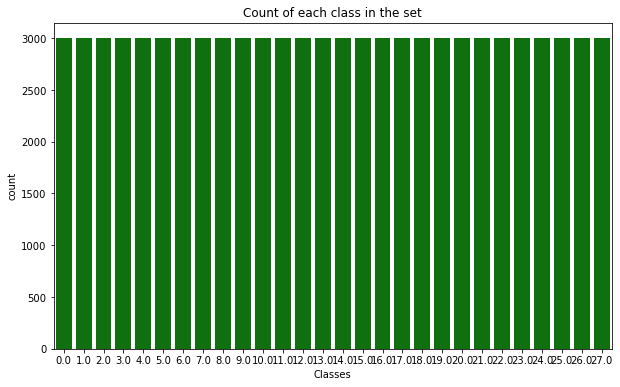

In [32]:
#Let's check the balance of classes in this set
plt.figure(figsize = (10,6))
sns.countplot(train_ASL['label'], color='g')
plt.title('Count of each class in the set')
plt.xlabel('Classes')
plt.show()

The ASL dataset seems perfectly balanced with 3,000 images per class. This will help with the little unbalanced classes of the MNIST set. Let's now get the third set ready.<br><br>I made this last set by taking 1,000 pictures of every of the 28 classes included in the ASL set. Let's make sure that the classes are balanced and ready. 

In [33]:
#Let's check one image sample of this set
img = Image.open('DATA/A/Image_1661693786.429059.jpg')
img = np.asarray(img)
img.shape

(28, 28)

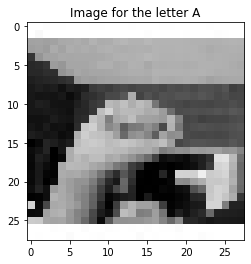

In [34]:
plt.imshow(img, cmap='gray')
plt.title('Image for the letter A')
plt.show()

It is clear that the quality of the image is lower than the original images in the ASL set. In this case, I will use the images with this size to decrease the computational time for the training of the model.

In [35]:
#I will do the same steps as with the ASL set
directory = 'DATA'

train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred", #labels are inferred from the labeled subfolders
    label_mode="int", #labels will be as integers
    seed = 0,
    color_mode="grayscale", #change to grayscale
    batch_size=28, #change batch size to 28 so there are no incomplete batches since the set has 28,000 images 
    image_size=(28, 28), #resize the images
    shuffle=True
)

#Convert the output to an array
train_arr = tfds.as_numpy(train)

Found 28000 files belonging to 28 classes.


In [36]:
#Use the function that was created before with the ASL set
dataset = transform_to_dataframe(train_arr, 28)

In [37]:
#Save the set with the webcam images information
dataset.to_csv('APPLE_CAM_train.csv')

In [38]:
#Read the saved dataset for webcam images
train_APPLE_CAM = pd.read_csv('APPLE_CAM_train.csv')
train_APPLE_CAM.shape

(28000, 786)

In [39]:
#This set also has an unwanted column, let's drop it
train_APPLE_CAM = train_APPLE_CAM.drop(columns='Unnamed: 0')
train_APPLE_CAM.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,8.0
1,255.0,255.0,255.0,255.0,168.0,171.0,168.0,166.0,172.0,178.0,...,139.0,141.0,134.0,131.0,132.0,255.0,255.0,255.0,255.0,6.0
2,255.0,255.0,255.0,134.0,135.0,128.0,126.0,123.0,129.0,129.0,...,231.0,214.0,157.0,0.0,20.0,9.0,251.0,251.0,250.0,15.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,20.0
4,255.0,255.0,255.0,254.0,254.0,253.0,255.0,181.0,181.0,185.0,...,126.0,121.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,25.0


In [40]:
#Let's see if there are any missing values in this set
print(train_APPLE_CAM.isnull().any().sum())

0


In [41]:
#Let's check the number of columns and dtype
train_APPLE_CAM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 785 entries, pixel1 to label
dtypes: float64(785)
memory usage: 167.7 MB


In [42]:
#Let's check if there are no negative values nor values over 255
print((((train_APPLE_CAM >= 0) & (train_APPLE_CAM <= 255)) == 0).any().sum())

0


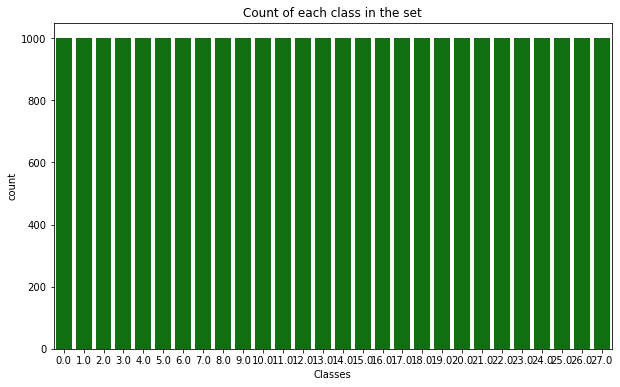

In [43]:
#Let's check the balance of classes in this set
plt.figure(figsize = (10,6))
sns.countplot(train_APPLE_CAM['label'], color='g')
plt.title('Count of each class in the set')
plt.xlabel('Classes')
plt.show()

Just as expected, the classes are balanced with 1,000 images per class. Also, there are no null or negative values in the last dataset.<br><br>
Now, let's put all the information together before proceeding to make the train and test splits. Additionally, I will make a test set which includes the test_MNIST set.

In [44]:
#Create y_train variables for each of the three sets
y_train_ASL = train_ASL['label']
y_train_MNIST = train_MNIST['label']
y_train_APPLE_CAM = train_APPLE_CAM['label']
y_train_ASL.shape, y_train_MNIST.shape, y_train_APPLE_CAM.shape

((84000,), (27455,), (28000,))

In [45]:
#There is some preprocessing to do to match all sets to 28 classes
len(y_train_ASL.value_counts()), len(y_train_MNIST.value_counts()), len(y_train_APPLE_CAM.value_counts())

(28, 24, 28)

In [46]:
#Move the label column to the end position in the MNIST set. 
#This way all three set will have the same column structure.
train_MNIST = train_MNIST.drop(columns=['label'])
train_MNIST.insert(784, 'label', y_train_MNIST)
train_MNIST.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,206,206,206,204,203,202,3
1,155,157,156,156,156,157,156,158,158,157,...,149,128,87,94,163,175,103,135,149,6
2,187,188,188,187,187,186,187,188,187,186,...,201,200,199,198,199,198,195,194,195,2
3,211,211,212,212,211,210,211,210,210,211,...,234,233,231,230,226,225,222,229,163,2
4,164,167,170,172,176,179,180,184,185,186,...,105,105,108,133,163,157,163,164,179,13


In [47]:
#All information needs to be in float dtype
train_MNIST = train_MNIST.astype('float32')
train_ASL = train_ASL.astype('float32')
train_APPLE_CAM = train_APPLE_CAM.astype('float32')

In [48]:
#I will concatenate all three sets together in the following order: MNIST, APPLE_CAM, ASL
train = pd.concat([train_MNIST, train_APPLE_CAM])
train = pd.concat([train, train_ASL])
train.shape

(139455, 785)

In [49]:
#Let's reset the index to avoid keeping the index from the original sets
train = train.reset_index().sort_values(by=['index'])
train = train.drop(columns='index').reset_index(drop=True)

In [50]:
#Let's check the concatenated set
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,107.000000,118.000000,127.000000,134.000000,139.000000,143.000000,146.000000,150.000000,153.000000,156.000000,...,207.000000,207.000000,207.000000,206.000000,206.000000,206.000000,204.000000,203.000000,202.000000,3.0
1,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,8.0
2,95.331635,95.739792,94.285713,102.821426,107.091835,112.045914,141.122452,127.112244,174.158173,244.127548,...,135.928574,144.918365,145.576538,137.770416,136.142853,129.821442,128.831635,134.229584,137.877548,12.0
3,84.923470,87.382652,88.469391,89.964287,89.709183,99.357147,127.714279,122.841827,186.949005,245.438782,...,135.071411,130.642868,125.000000,128.673477,130.000000,122.750008,122.500000,119.571442,126.020409,27.0
4,155.000000,157.000000,156.000000,156.000000,156.000000,157.000000,156.000000,158.000000,158.000000,157.000000,...,149.000000,128.000000,87.000000,94.000000,163.000000,175.000000,103.000000,135.000000,149.000000,6.0


The final set, after concatenation, seems correct. It has the float dtype and the columns are in the correct order. Now it's time to make train-test splits to train the model. But first, let's create the test set that will be used to check the performance of the model after training.

In order to create the test set, I will split 30,000 images from the train dataset, since it has almost 140,000 observations. The reason for this, is to decrease the amount of images that I will feed into the model, so the computational time is less. I will add these 30,000 images to the test_MNIST set to create the test set.

In [51]:
#First, let's get the test_MNIST set ready
#Move the label column to the end position
y_test_MNIST = test_MNIST['label']
test_MNIST = test_MNIST.drop(columns=['label'])
test_MNIST.insert(784, 'label', y_test_MNIST)
test_MNIST.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,149,149,150,150,150,151,151,150,151,152,...,148,127,89,82,96,106,112,120,107,6
1,126,128,131,132,133,134,135,135,136,138,...,104,194,183,186,184,184,184,182,180,5
2,85,88,92,96,105,123,135,143,147,152,...,166,242,227,230,227,226,225,224,222,10
3,203,205,207,206,207,209,210,209,210,209,...,248,247,248,253,236,230,240,253,255,0
4,188,191,193,195,199,201,202,203,203,203,...,40,64,48,29,46,49,46,46,53,3


In [52]:
#Convert the dtype to float
test_MNIST = test_MNIST.astype('float32')

In [53]:
#Concatenate the test_MNIST set and the split of 30,000 images from the train set
test = pd.concat([test_MNIST, train[-30000:]])
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,149.0,149.0,150.0,150.0,150.0,151.0,151.0,150.0,151.0,152.0,...,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0,6.0
1,126.0,128.0,131.0,132.0,133.0,134.0,135.0,135.0,136.0,138.0,...,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0,5.0
2,85.0,88.0,92.0,96.0,105.0,123.0,135.0,143.0,147.0,152.0,...,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0,10.0
3,203.0,205.0,207.0,206.0,207.0,209.0,210.0,209.0,210.0,209.0,...,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0,0.0
4,188.0,191.0,193.0,195.0,199.0,201.0,202.0,203.0,203.0,203.0,...,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0,3.0


In [54]:
#Let's create the features (X_test) and the labels (y_test) variables for the test set.
test.reset_index(drop=True, inplace=True)
X_test = test.drop(columns='label')
y_test = test['label']

In [55]:
#Drop 30,000 images from the train set, and create the X and y
X = train[:-30000].drop(columns='label')
y = train['label'][:-30000]

In [56]:
#Let's take a look at the shapes of the train and test sets
X.shape, y.shape, X_test.shape, y_test.shape

((109455, 784), (109455,), (37172, 784), (37172,))

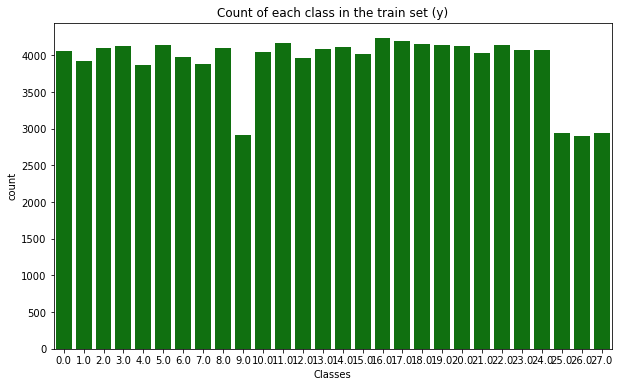

In [57]:
#Plot the balance of classes in the train set
plt.figure(figsize = (10,6))
sns.countplot(y, color='g')
plt.title('Count of each class in the train set (y)')
plt.xlabel('Classes')
plt.show()

I have now a train set of 109,455 images and a test set of 37,172 images. The balance of the classes on the train set is similar to what it was expected. Classes 9, 25, 26 and 27 have less samples than the other classes because the MNIST set didn't have these 4 classes. Now, let's proceed with the train-test split and create the train and validation sets.

In [58]:
#Use a 10% test_size split for the validation set and stratify on 'y' so the classes are well balanced in both sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [59]:
X_train.shape, y_train.shape

((98509, 784), (98509,))

In [60]:
X_val.shape, y_val.shape

((10946, 784), (10946,))

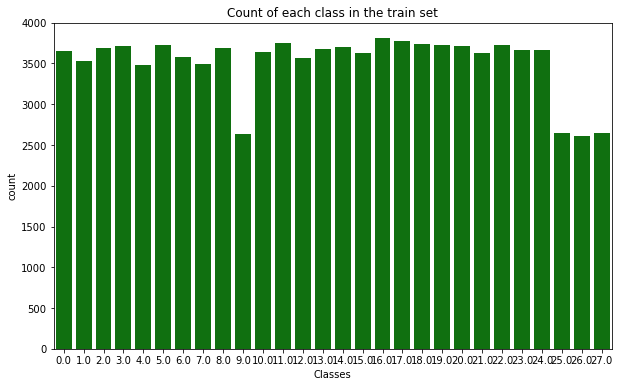

In [61]:
plt.figure(figsize = (10,6))
sns.countplot(y_train, color='g')
plt.title('Count of each class in the train set')
plt.xlabel('Classes')
plt.show()

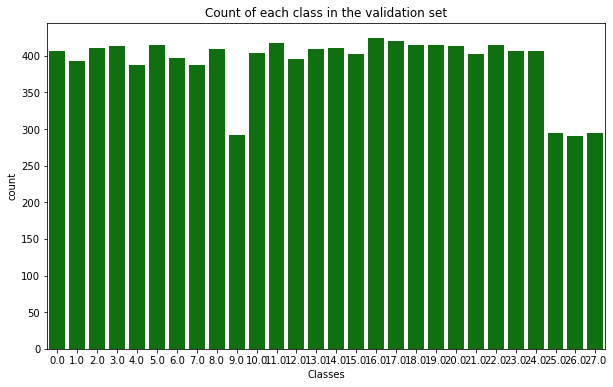

In [62]:
plt.figure(figsize = (10,6))
sns.countplot(y_val, color='g')
plt.title('Count of each class in the validation set')
plt.xlabel('Classes')
plt.show()

There are 98,509 images for the train set and 10,946 images for the validation set. The classes in both sets seem to be correctly distributed. The next step is the preparation of the information to train the model.<br><br>
# Preprocessing
First, the labels need to be one hot encoded. Additionally, I will normalize to [0,1] the values for the pixels, so that the model can train easier. Finally, I will reshape the features in the shape needed for the model.

In [63]:
#Use LabelBinarizer to encode the labels
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test_enc = encoder.transform(y_test)

In [64]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [65]:
#Normalize to [0,1] the values for the pixels in the images
X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

In [66]:
#Reshape the sets in the correct shape to pass on to the model
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_val = X_val.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

# A quick reference on Convolutional Neural Networks (CNN)

Now, before going in to the modeling, let's take a quick overview of a Convolutional Neural Network (CNN).<br><br>
A CNN is basically made of an input layer, a defined amount of hidden layers, and an output layer (see Fig. 2). In this case, the input layer is every image fed into the network. These images are passed into the hidden layers for filtering, reshaping and, basically, for creating a feature map. This map will eventually be passed to the output layer which contains the labels or classes for our classification problem.

<img src="../Images/CNN_hidden_layers.jpeg" width="720" height="60" align="center"/>
<center><b>Fig. 2</b><br></center><center>Reference: i2 Tutorials<br><i>https://www.i2tutorials.com/what-are-different-layers-in-neural-networks/<i></center>

The following image (Fig. 3) gives a wonderful and clear overview of a simple CNN.<br><br>
As mentioned previously, a CNN has an input layer which contains the data that will be fed into the network. These images will be fed into a hidden layer, which could be a convolutional layer, a pooling layer, among others. The purpose of a convolutional layer is to pass filters (kernels) over the images and try to learn features from them. Normally, intial convolutional layers will learn simple shapes, like lines and edges. As the network gets deeper, other convolutional layers will learn more complex shapes to make the network more robust and able to classify the images better.<br><br>
On the other hand, a pooling layer, will pass a kernel of size m x m on every region of the image, which will get the maximum or the average value of the pixels on this part of the image. The decision on whether to take the maximum or the average value of this part of the image depends on the type of pooling layer that is selected during the configuration of the network. A good example of a max pooling layer is shown on Fig. 4.<br><br>
After defining all the hidden layers in the convolutional section, which will determine the feature map for the network, it is necessary to flatten the values into an array which then will be the input of a Dense layer. The main property of a Dense layer is that it has all its nodes connected. Because of this, it is better to avoid using them on early stages of the network to prevent overfitting.<br><br>
Finally, the last Dense layer in the network is connected to the output layer, which contains the classes (in this case 28) that we have for classification.

<img src="../Images/CNN.png" width="960" height="120" align="center"/>
<center><b>Fig. 3</b><br></center><center>Reference TDS: By Saul Dobilas<br><i>https://towardsdatascience.com/convolutional-neural-networks-explained-how-to-successfully-classify-images-in-python-df829d4ba761<i></center>

The following image shows an example of a Max pooling layer. In this case, the size of the kernel (the small purple window passed to every region of the image) is 2 x 2. Additionally, the stride = 2, which indicates that the kernel will slide 2 pixels every time it moves to take the next maximum value in that region. In this example, the maxpool layer will reduce the size of the image from 4 x 4 to 2 x 2. 

<img src="../Images/maxpool.gif" width="640" height="60" align="center"/>
    <center><b>Fig. 4</b><br></center><center>Reference: NumPyNet<br><i>https://nico-curti.github.io/NumPyNet/NumPyNet/layers/maxpool_layer.html<i></center>

# Modeling

After a brief explanation on CNNs, let's continue on to training a first model. I will use the sequential model from Keras.

In [67]:
#Use filters of size 3 x 3 on convolutional layers, activation = rectified linear unit (relu)
#and padding = 'same' which means zero padding that keeps images in their same size
model = Sequential()
model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D())
model.add(Conv2D(32, kernel_size=2, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(28, activation='softmax')) #Use activation = 'softmax' due to multiple category classification
model.summary() #To show the summary of the network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                                 
 dense_1 (Dense)             (None, 28)                924       
                                                        

The summary() method shows the layers of the model, the shape of the output of every layer and the parameters on every layer. This graph of the model is very convenient to check how the information is passed to every layer, as well as the total number of parameters included in the model.

In [68]:
#Compile the model with accuracy as metric and categorical_entropy loss for multiple classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
#Let's train the model on 5 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
3079/3079 [==============================] - 117s 38ms/step - loss: 1.5995 - accuracy: 0.5141 - val_loss: 0.8935 - val_accuracy: 0.7183
Epoch 2/5
3079/3079 [==============================] - 116s 38ms/step - loss: 0.6862 - accuracy: 0.7796 - val_loss: 0.5459 - val_accuracy: 0.8249
Epoch 3/5
3079/3079 [==============================] - 115s 37ms/step - loss: 0.4696 - accuracy: 0.8497 - val_loss: 0.4010 - val_accuracy: 0.8729
Epoch 4/5
3079/3079 [==============================] - 116s 38ms/step - loss: 0.3613 - accuracy: 0.8838 - val_loss: 0.3356 - val_accuracy: 0.8940
Epoch 5/5
3079/3079 [==============================] - 115s 37ms/step - loss: 0.2932 - accuracy: 0.9054 - val_loss: 0.2780 - val_accuracy: 0.9107


Let's plot the training and validation loss values through every epoch to see if during training there is some overfitting

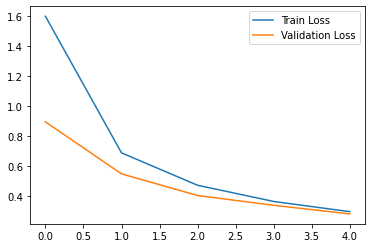

In [70]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

There doesn't seem to be any overfitting present. Also, it looks like if the number of epochs is increased, maybe we could get a little higher accuracy.<br><br>
I will check now the performance of the model. Let's see if it can generalize well.

In [71]:
print('The accuracy of the model is:', model.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 11s 10ms/step - loss: 0.6843 - accuracy: 0.8030
The accuracy of the model is: 80.30237555503845 %


The accuracy of this first model is ~80% on the test set. Comparing this result to the 91% accuracy on the validation set, it looks like there is some overfitting present in the model.<br><br>
Perhaps some data augmentation with images rotated, shifted, flipped, etc. could help. Additionally, let's include some dropout layers to cut some node connections and reduce the overfitting problem.

In [72]:
#Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
)

In [73]:
#Add dropout layers to the model_2
model_2 = Sequential()
model_2.add(Conv2D(64, kernel_size=2, activation='relu', padding='same', input_shape=(28, 28, 1)))
model_2.add(MaxPool2D())
model_2.add(Conv2D(32, kernel_size=2, activation='relu', padding='same'))
model_2.add(Dropout(0.3)) #drop 30% node connections in this layer
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(28, activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                200736    
                                                      

In [74]:
#Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
#Include data augmented during model fitting
history = model_2.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
3079/3079 [==============================] - 138s 45ms/step - loss: 2.8731 - accuracy: 0.1467 - val_loss: 2.3803 - val_accuracy: 0.2676
Epoch 2/5
3079/3079 [==============================] - 145s 47ms/step - loss: 2.4527 - accuracy: 0.2431 - val_loss: 2.0700 - val_accuracy: 0.3361
Epoch 3/5
3079/3079 [==============================] - 155s 50ms/step - loss: 2.2758 - accuracy: 0.2868 - val_loss: 1.9441 - val_accuracy: 0.3734
Epoch 4/5
3079/3079 [==============================] - 147s 48ms/step - loss: 2.1570 - accuracy: 0.3179 - val_loss: 1.7864 - val_accuracy: 0.4209
Epoch 5/5
3079/3079 [==============================] - 153s 50ms/step - loss: 2.0776 - accuracy: 0.3391 - val_loss: 1.7785 - val_accuracy: 0.4216


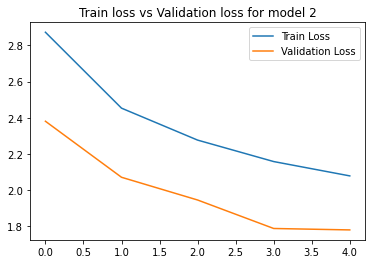

In [76]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train loss vs Validation loss for model 2')
plt.legend()
plt.show()

In [77]:
print('The accuracy of the model is:', model_2.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 11s 9ms/step - loss: 1.9943 - accuracy: 0.3561
The accuracy of the model is: 35.61013638973236 %


The second model is worse than the first one. The accuracy of this model decreased considerably and it did not improve constantly with every epoch.<br><br>
On the other hand, the difference between the accuracy on the test set vs the validation accuracy improved by a small amount. It seems that, the data augmentation helped the model to decrease the overfitting and generalize better, although the accuracy is very poor.<br><br>
Now, let's try to improve the model by adding some more layers to it.

In [78]:
#Reduce the filters for the first Conv2d layer and increase them for the subsequent layers
#Additionally, include BatchNormalization for regularization of the inputs
#Increase the dropout layers
#Increase the dense layers and the units in each of them
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_3.add(Dropout(0.3))
model_3.add(BatchNormalization())
model_3.add(Flatten())
model_3.add(Dense(units = 512 , activation = 'relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(units = 512 , activation = 'relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(28, activation='softmax'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)      

In [79]:
#Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
history = model_3.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
1540/1540 [==============================] - 336s 217ms/step - loss: 2.9823 - accuracy: 0.1197 - val_loss: 2.6185 - val_accuracy: 0.1908
Epoch 2/5
1540/1540 [==============================] - 340s 220ms/step - loss: 2.5882 - accuracy: 0.1991 - val_loss: 2.2692 - val_accuracy: 0.2801
Epoch 3/5
1540/1540 [==============================] - 346s 225ms/step - loss: 2.2807 - accuracy: 0.2778 - val_loss: 2.1593 - val_accuracy: 0.3131
Epoch 4/5
1540/1540 [==============================] - 343s 223ms/step - loss: 1.9992 - accuracy: 0.3568 - val_loss: 1.7543 - val_accuracy: 0.4254
Epoch 5/5
1540/1540 [==============================] - 350s 227ms/step - loss: 1.7722 - accuracy: 0.4246 - val_loss: 1.3172 - val_accuracy: 0.5495


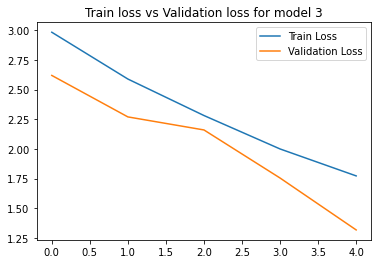

In [81]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train loss vs Validation loss for model 3')
plt.legend()
plt.show()

In [82]:
print('The accuracy of the model is:', model_3.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 33s 29ms/step - loss: 1.5771 - accuracy: 0.4625
The accuracy of the model is: 46.247175335884094 %


This new model increased a little the accuracy in validation, as well as in test. Let's try to tune a few more parameters to see if it's possible to improve more the performance of the model.

I will add a callback for reducing the learning rate in case that the improvement has stopped. Additionally, I will add more hidden layers to the model.

In [83]:
#This learning rate reduce callback will monitor the validation loss
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    patience = 1, 
    verbose=1,
    factor=0.5, 
    min_lr=0.000001
)

In [84]:
#Added more convolutional and dropout layers to this model
model_4 = Sequential()
model_4.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_4.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_4.add(Flatten())
model_4.add(Dense(units = 512 , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(units = 512 , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(units = 512 , activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(units = 28 , activation = 'softmax'))
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)      

In [85]:
#Compile the model
model_4.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [86]:
#Fit the model including the data augmented and the callback
history = model_4.fit(datagen.flow(X_train, y_train, batch_size=128), validation_data=(X_val, y_val), epochs=5, callbacks = [reduce_lr])

Epoch 1/5
770/770 [==============================] - 557s 721ms/step - loss: 2.6175 - accuracy: 0.1978 - val_loss: 1.8396 - val_accuracy: 0.3789 - lr: 0.0010
Epoch 2/5
770/770 [==============================] - 606s 786ms/step - loss: 1.7251 - accuracy: 0.4284 - val_loss: 1.1890 - val_accuracy: 0.5811 - lr: 0.0010
Epoch 3/5
770/770 [==============================] - 646s 839ms/step - loss: 1.3061 - accuracy: 0.5609 - val_loss: 0.8039 - val_accuracy: 0.7140 - lr: 0.0010
Epoch 4/5
770/770 [==============================] - ETA: 0s - loss: 1.0665 - accuracy: 0.6388
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
770/770 [==============================] - 575s 747ms/step - loss: 1.0665 - accuracy: 0.6388 - val_loss: 0.9843 - val_accuracy: 0.6747 - lr: 0.0010
Epoch 5/5
770/770 [==============================] - 578s 751ms/step - loss: 0.8340 - accuracy: 0.7151 - val_loss: 0.5734 - val_accuracy: 0.8039 - lr: 5.0000e-04


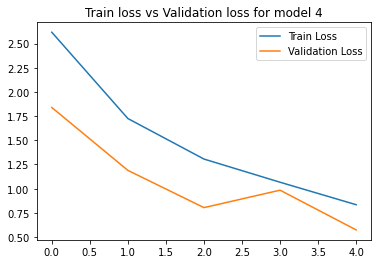

In [87]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train loss vs Validation loss for model 4')
plt.legend()
plt.show()

In [88]:
print('The accuracy of the model is:', model_4.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 54s 46ms/step - loss: 0.7099 - accuracy: 0.7559
The accuracy of the model is: 75.58646202087402 %


Accuracy in the test set improved from 46% to 76%. It seems that the model needs more epochs to be able to generalize better. Let's increase the number of epochs to 25.

In [95]:
#This is the same model structure as model 4 but with increased epochs to 25
model_5 = Sequential()
model_5.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_5.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(BatchNormalization())
model_5.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_5.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_5.add(Flatten())
model_5.add(Dense(units = 512 , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(units = 512 , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(units = 512 , activation = 'relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(units = 28 , activation = 'softmax'))
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 14, 14, 64)      

In [96]:
#Compile the model
model_5.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [97]:
#Fit the model including the data augmented and with 25 epochs
history = model_5.fit(datagen.flow(X_train, y_train, batch_size=128), validation_data=(X_val, y_val), epochs=25, callbacks = [reduce_lr])

Epoch 1/25
770/770 [==============================] - 547s 707ms/step - loss: 2.1990 - accuracy: 0.3155 - val_loss: 1.1222 - val_accuracy: 0.6096 - lr: 0.0010
Epoch 2/25
770/770 [==============================] - 568s 737ms/step - loss: 1.1050 - accuracy: 0.6263 - val_loss: 0.5391 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 3/25
770/770 [==============================] - 558s 725ms/step - loss: 0.7409 - accuracy: 0.7494 - val_loss: 0.8017 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 4/25
770/770 [==============================] - 547s 710ms/step - loss: 0.5867 - accuracy: 0.8030 - val_loss: 0.4845 - val_accuracy: 0.8381 - lr: 0.0010
Epoch 5/25
770/770 [==============================] - 544s 706ms/step - loss: 0.4866 - accuracy: 0.8382 - val_loss: 0.3738 - val_accuracy: 0.8816 - lr: 0.0010
Epoch 6/25
770/770 [==============================] - 543s 705ms/step - loss: 0.4270 - accuracy: 0.8594 - val_loss: 0.3396 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 7/25
770/770 [==========================

In [112]:
from tensorflow.keras.models import load_model

# save the model to use it later
model_5.save('Model_capstone.h5')
print('Model Saved!')

Model Saved!


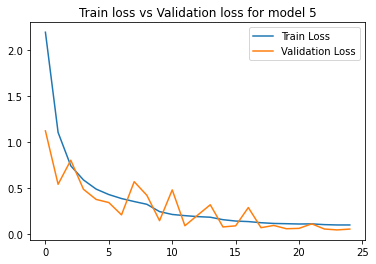

In [99]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train loss vs Validation loss for model 5')
plt.legend()
plt.show()

In [100]:
print('The accuracy of the model is:', model_5.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 50s 42ms/step - loss: 0.0741 - accuracy: 0.9745
The accuracy of the model is: 97.44969606399536 %


This last model had a very good accuracy on both train and validations sets. As expected, increasing the number of epochs to 25 let the model achieve a better result.<br><br>
In the loss plot it is clear that the model had some variations up to approximately 17 epochs. After this point, it stabilized until the end of the run.<br><br>
The accuracy on the test set improved up to 97.4%. This is a great improvement, but still short to the goal, which is 100%.<br><br>
Let's take a look at the classification report for this model to identify which classes were harder for the model to classify correctly.

In [151]:
#Let's load Model_capstone to see if it was saved correctly. Then use it to create the report
model_capstone=load_model('Model_capstone.h5')
model_capstone.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 14, 14, 64)      

In [152]:
#Make predictions on the 37172 samples of the X_test
y_pred = model_capstone.predict(X_test)
y_pred =np.argmax(y_pred,axis=1)

1162/1162 [==============================] - 71s 61ms/step


In [153]:
print('Classification report for the best model with Data augmented')
print(classification_report(y_test, y_pred, target_names = list(dict_classes.values())))

Classification report for the best model with Data augmented
              precision    recall  f1-score   support

           A       1.00      0.91      0.95      1395
           B       1.00      0.97      0.98      1513
           C       1.00      1.00      1.00      1357
           D       1.00      1.00      1.00      1311
           E       0.93      0.99      0.96      1583
           F       1.00      1.00      1.00      1316
           G       0.99      0.99      0.99      1466
           H       1.00      0.99      1.00      1566
           I       0.98      0.99      0.99      1356
           J       0.99      1.00      0.99      1079
           K       0.96      1.00      0.98      1402
           L       1.00      1.00      1.00      1279
           M       0.96      0.98      0.97      1486
           N       0.99      0.94      0.96      1353
           O       0.96      0.99      0.98      1329
           P       0.97      1.00      0.98      1410
           Q       0

The report indicates that some of the most difficult classes were 'R','U','V' and 'W'. Let's check some examples of the misclassified classes.

In [154]:
#Reset the index on the y_test labels to match the index in the y_pred
y_test = y_test.reset_index(drop=True)

In [155]:
#Create a boolean array of '1' indicating correct and '0' indicating incorrect classification
arr = []
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        arr.append(1)
    else:
        arr.append(0)

In [156]:
#Print the number of records misclassified and the accuracy on predictions
result = [i for i,j in enumerate(arr) if j == 0]
print(f'There are {len(result)} records misclassified of a total of {len(arr)} records')
print(f'The accuracy in predictions is: {round(1-(len(result)/len(arr)),4)*100}%')

There are 948 records misclassified of a total of 37172 records
The accuracy in predictions is: 97.45%


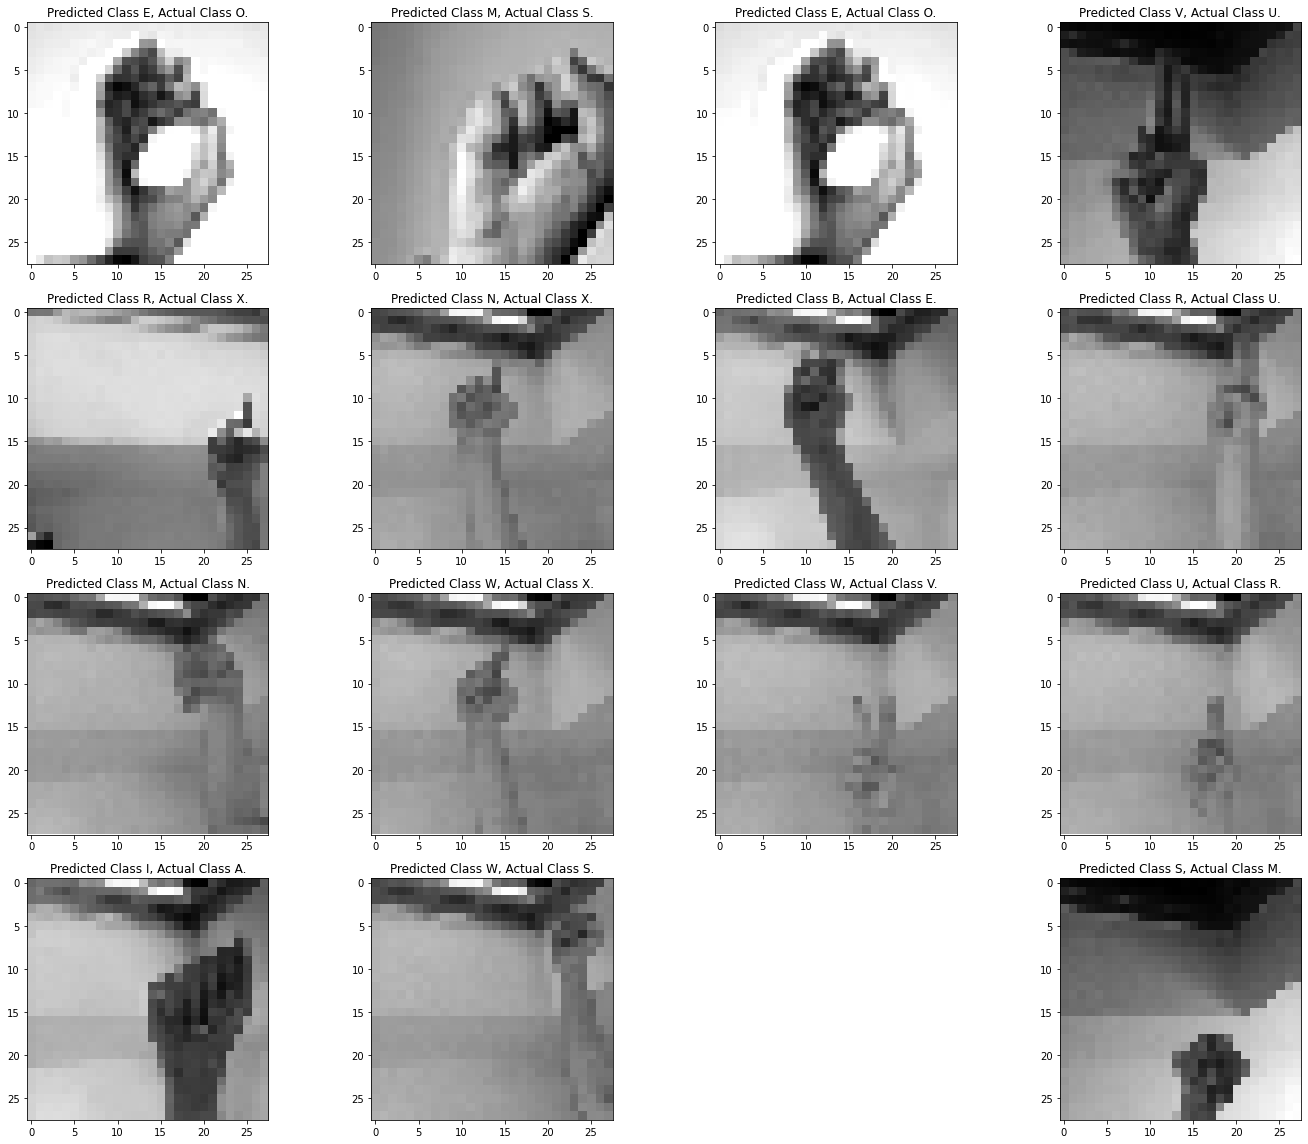

In [164]:
#Print some samples of the misclassified classes
plt.figure(figsize=(20,16))
i = 0
for j in result[:16]:
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[j].reshape(28,28), cmap='gray')
    plt.title(f'Predicted Class {dict_classes[y_pred[j]]}, Actual Class {dict_classes[y_test[j]]}.')
    plt.tight_layout()
    i += 1

It seems that, even though the epochs helped to increase the accuracy of the model, the model still makes a lot of misclassifications. Perhaps the original data (without the augmented data) is enough to train the model and obtain a better result. Let's try one more model with no augmented data and the same structure as the previous one. 

In [105]:
#Model with the same structure as model 5
model_6 = Sequential()
model_6.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model_6.add(BatchNormalization())
model_6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_6.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_6.add(Dropout(0.3))
model_6.add(BatchNormalization())
model_6.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_6.add(Dropout(0.3))
model_6.add(BatchNormalization())
model_6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_6.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_6.add(Dropout(0.3))
model_6.add(BatchNormalization())
model_6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_6.add(Flatten())
model_6.add(Dense(units = 512 , activation = 'relu'))
model_6.add(Dropout(0.3))
model_6.add(Dense(units = 512 , activation = 'relu'))
model_6.add(Dropout(0.3))
model_6.add(Dense(units = 512 , activation = 'relu'))
model_5.add(Dropout(0.3))
model_6.add(Dense(units = 28 , activation = 'softmax'))
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 14, 14, 64)      

In [106]:
#Compile the model
model_6.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [107]:
#Model to train with no augmented data, 15 epochs and callbacks
history = model_6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks = [reduce_lr])

Epoch 1/15
3079/3079 [==============================] - 633s 205ms/step - loss: 1.0908 - accuracy: 0.6529 - val_loss: 0.3132 - val_accuracy: 0.8938 - lr: 0.0010
Epoch 2/15
3079/3079 [==============================] - 642s 208ms/step - loss: 0.3441 - accuracy: 0.8899 - val_loss: 0.3459 - val_accuracy: 0.8941 - lr: 0.0010
Epoch 3/15
3079/3079 [==============================] - 644s 209ms/step - loss: 0.2479 - accuracy: 0.9250 - val_loss: 0.1060 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 4/15
3079/3079 [==============================] - 636s 206ms/step - loss: 0.1890 - accuracy: 0.9435 - val_loss: 0.2199 - val_accuracy: 0.9322 - lr: 0.0010
Epoch 5/15
3079/3079 [==============================] - 637s 207ms/step - loss: 0.1665 - accuracy: 0.9520 - val_loss: 0.0607 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 6/15
3079/3079 [==============================] - 639s 208ms/step - loss: 0.1497 - accuracy: 0.9584 - val_loss: 0.1117 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 7/15
3079/3079 [============

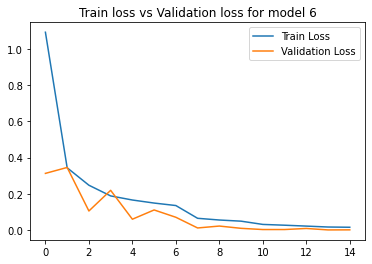

In [108]:
#Plot train and validation losses of the model
plt.subplots()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train loss vs Validation loss for model 6')
plt.legend()
plt.show()

In [109]:
print('The accuracy of the model is:', model_6.evaluate(X_test, y_test_enc)[1]*100, '%')

1162/1162 [==============================] - 51s 44ms/step - loss: 0.0052 - accuracy: 0.9981
The accuracy of the model is: 99.80899691581726 %


In [113]:
#Let's save the model with no datagen
model_6.save('Model_no_datagen.h5')
print('Model Saved!')

Model Saved!


This model definitely performs better than the previous one. In 15 epochs it was able to achieve 99.8% accuracy on the test set. Additionally, as seen in the loss plot, the variation on the train and validation losses, stabilized after epoch 7th. Let's take a look now at the classification report and the total number of misclassified classes.

In [165]:
#Let's load Model_no_datagen to see if it was saved correctly. Then use it to create the report
model_no_datagen=load_model('Model_no_datagen.h5')
model_no_datagen.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 14, 14, 64)      

In [166]:
#Make predictions on the 37172 samples of the X_test
y_pred = model_no_datagen.predict(X_test)
y_pred =np.argmax(y_pred,axis=1)

1162/1162 [==============================] - 72s 62ms/step


In [167]:
print('Classification report for the model with no Data augmented')
print(classification_report(y_test, y_pred, target_names = list(dict_classes.values())))

Classification report for the model with no Data augmented
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1395
           B       1.00      1.00      1.00      1513
           C       1.00      1.00      1.00      1357
           D       1.00      1.00      1.00      1311
           E       1.00      1.00      1.00      1583
           F       1.00      1.00      1.00      1316
           G       1.00      1.00      1.00      1466
           H       1.00      1.00      1.00      1566
           I       1.00      1.00      1.00      1356
           J       1.00      1.00      1.00      1079
           K       1.00      1.00      1.00      1402
           L       1.00      1.00      1.00      1279
           M       1.00      0.99      0.99      1486
           N       0.99      1.00      0.99      1353
           O       1.00      1.00      1.00      1329
           P       1.00      1.00      1.00      1410
           Q       1.0

This model looks very promising. It had only a few mistakes during classification. Now, let's plot a heatmap to have a better look at the classes misclassified.

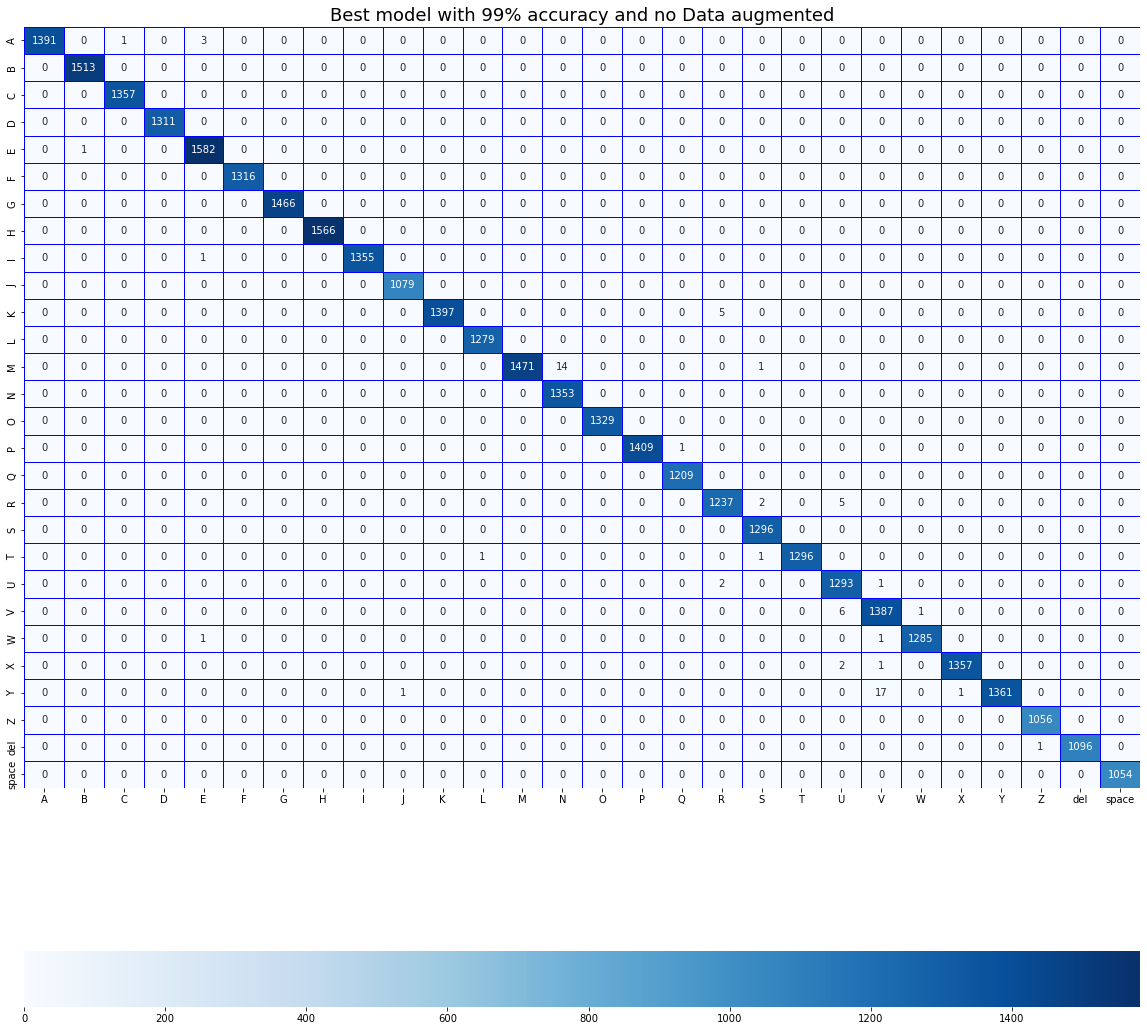

In [168]:
#Plot the heatmap
plt.figure(figsize = (20,20))
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=dict_classes.values(), columns=dict_classes.values())
sns.heatmap(c_matrix, cmap= "Blues", annot = True, fmt='d', linewidths=.5, linecolor='blue', cbar_kws={"orientation": "horizontal"})
plt.title('Best model with 99% accuracy and no Data augmented', size=18)
plt.show()

In [169]:
#Create a boolean array of '1' indicating correct and '0' indicating incorrect classification
arr = []
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        arr.append(1)
    else:
        arr.append(0)

In [170]:
#Print the number of records misclassified and the accuracy on predictions
result = [i for i,j in enumerate(arr) if j == 0]
print(f'There are {len(result)} records misclassified of a total of {len(arr)} records')
print(f'The accuracy in predictions is: {round(1-(len(result)/len(arr)),4)*100}%')

There are 71 records misclassified of a total of 37172 records
The accuracy in predictions is: 99.81%


There were only 71 mistakes on more than 37,000 samples to classify. I will use this model for a final test.<br><br>
In this last step of the process, I will test my model on real time classification. I will use my webcam to take video of my hand creating different shapes of letters in ASL. Let's see if the classification is accurate.<br><br>
I will use some cv2 utilities from the cvzone library.<br>
For more information on this library visit: https://www.computervision.zone/

In [ ]:
#This code was adapted from: https://github.com/cvzone/cvzone
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import keras
import string
import time
import numpy as np
import math

cap = cv2.VideoCapture(0)#Initialize a capture variable for the video of the camara (device 0)
detector = HandDetector(maxHands=1) #Use HandDetector utility to check if there are any hands present

#I will use the model with no augmented data and the 28 defined classes
clf = Classifier('Model_no_datagen.h5', 'labels.txt') #This function needs a .txt file for the labels
labels = list(dict_classes.values())
offset = 100 #Offset for the frame of the image
imgSize = 400 #Image size to detect

while True:
    success, img = cap.read() #read the image
    imgOutput = img.copy() 
    hands = detector.findHands(img, draw=False) #detect the image of a hand
    if hands: #if any hands present
        hand = hands[0] 
        x, y, w, h = hand['bbox']
        imgWhite = np.ones((imgSize,imgSize,3), np.uint8)*255 #Create a white background
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset] #Define the size of the image
        
        aspectRatio = h / w
        
        if aspectRatio > 1: #Conditional to center the image if height is greater than the width
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize)) #resize the image
            wGap = math.ceil((imgSize - wCal)/2) #center the image
            imgWhite[:,wGap:wCal + wGap] = imgResize #Superimpose the image on the white background
            #Setup of this function was modified on the .py file to be able to receive 28 x 28 grayscale images
            prediction, index = clf.getPrediction(cv2.cvtColor(imgWhite, cv2.COLOR_BGR2GRAY))
            
        else: #Conditional to center the image if height is less than or equal to the width
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal)) #resize the image
            hGap = math.ceil((imgSize - hCal)/2) #center the image
            imgWhite[hGap:hCal + hGap, :] = imgResize #Superimpose the image on the white background
            #Setup of this function was modified on the .py file to be able to receive 28 x 28 grayscale images
            prediction, index = clf.getPrediction(cv2.cvtColor(imgWhite, cv2.COLOR_BGR2GRAY))
        
        #Display text over the image to show the predicted class
        cv2.putText(imgOutput, labels[index], (x,y), cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
        cv2.imshow('ImageCrop', imgCrop)
        cv2.imshow('ImageWhite', imgWhite)
        
    cv2.imshow('Image', imgOutput)
    cv2.waitKey(1)



2022-09-06 18:32:53.926817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1/1 [==============================] - 0s 25ms/step


After testing the model on this last trial, there were some classes classified correctly and other that were wrongly classified. The following images show some samples of the classification executed during this last test.

<img src="../Images/Trial_A.png" width="240" height="240" align="center"/>
<center><i>Predicted class: A, Actual class: A<i></center>

<img src="../Images/Trial_B.png" width="240" height="240" align="center"/>
<center><i>Predicted class: B, Actual class: B<i></center>

<img src="../Images/Trial_I.png" width="240" height="240" align="center"/>
<center><i>Predicted class: I, Actual class: I<i></center>

<img src="../Images/Trial_P.png" width="240" height="240" align="center"/>
<center><i>Predicted class: P, Actual class: P<i></center>

<img src="../Images/Trial_R.png" width="240" height="240" align="center"/>
<center><i>Predicted class: K, Actual class: R<i></center>

<img src="../Images/Trial_X.png" width="240" height="240" align="center"/>
<center><i>Predicted class: E, Actual class: X<i></center>

# Conclusion:

During this project, three different datasets were used with the purpose of training a model with enough data. All 3 sets were preprocessed and merged into one big dataset.<br><br>

After having all the information ready, six models in total were trained. Two of them were trained on the original merged dataset, while the other four models were trained using additional augmented data, fed to the model during the fitting process.<br><br>

At the end of the training process there were only two models left.<br>
The first model used the additional augmented data and was able to achieve ~97% accuracy on the test data.<br>
On the other hand, the second model didn't use the additional data during training and was able to achieve an accuracy greater than 99%.<br><br>

Finally, the chosen model, with over 99% accuracy, was put to a final test to try to classify images on a real time video scenario. The model was able to classify correctly 4 out of 6 images.

Based on the results obtained during this project, I can conclude the following:<br><br>

This project was a great opportunity to work with image recognition and understand the basics of convolutional neural networks.<br><br>

I think that it was very beneficial to have as much information (images) as possible to train the model, but I was able to understand the challenge in finding a proper network to classify with high accuracy. Every component of the network plays an important roll in the classification process so, the better you understand these components, the better chance you have to improve its performance.<br><br>

Additionally, by the end of the training process, I was able to see that the network trained without augmented data performed the best, but during the final challenge seemed to lose some classification power. This problem makes me wonder whether an improved version of the best model trained with augmented data, could get better results than the one with 99% accuracy. How important is the augmented data when you have ~100,000 images to train your model?

There is more area to explore with the real time video use to classify images. I understood that even though my model had almost perfect accuracy, this doesn't mean that it will perform well in any environment. Perhaps I need to acquire even more data to tackle this challenge.